<img src="https://github.com/Rubyw123/TMDB-Revenue-Prediction/blob/master/tmdb.png?raw=1" align="center">

<h2 align="center">Box Office Predictor: Leveraging Twitter/Reddit and Movie Data</h2>



- Introduction
- Data Set
- Projejct Objective
- Project Motivation
- Loading the Data and Importing Libraries
- Gathering Data
- Exploratory Data Analysis
- Featured Engineering
- Conclusion


## <font color='skyblue'>Introduction</font>

In a world where the film industry generates billions of dollars in revenue, predicting box office success has become a paramount concern for movie studios and industry stakeholders.

Our goal is to develop a powerful box office predictor that leverages data-driven techniques to forecast movie revenue in a somewhat accurate way.

Accurate box office predictions assist stakeholders, including film studios, distributors, and investors, in making informed decisions regarding marketing strategies, resource allocation, and financial investments.

## <font color='skyblue'>Data Set</font>

- Credits: We have refered and modifed the files and notebooks about the machine learning model that shared by the competition
1. https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset 
2. https://www.kaggle.com/datasets/akshaypawar7/millions-of-movies
3. https://www.kaggle.com/competitions/tmdb-box-office-prediction



- The Movie Database (TMDb) API:
Main source of new coming dataset.
Provides up-to-date information on movies, including details like genre, cast, budget, and ratings,etc.
- IMDb Dataset API:
Used to fill out missing data in our dataset.
Enhances the completeness and accuracy of movie information.
- Kaggle Movie Dataset:
Main source of training datasets. These files contain metadata for more than 700,000 movies listed in the TMDB Dataset. The dataset Update daily to ensure updated movies dataset. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages, reviews, recommendations.
Provides a diverse range of movie-related datasets for machine learning model development and training.

- Twitter and Reddit APIs
Main source of high volume of data
Provides a vast amount of feedback and real-time data related to movies, casts, and directors.
Provides a platform for in-depth discussions and community opinions and offers a broader perspective on audience attitudes and sentiments.



## <font color='skyblue'>Project Objective</font>

Our goal is to develop a powerful box office prediction model that leverages data-driven techniques to forecast movie revenue and create the website to deploy the model and to display the visualizations for more insights.

The secondary goal is to practice skills data wrangling, data visualization, Random forest, Linear Regression,LGB boost, GB regressor

## <font color='skyblue'>Project Methodlogy</font>


1. Incorporate relevant features from movies datasets:
- Movie genres
- Cast
- Director
- Budget
- Revenue 
- Votes rating
- Runtime
- etc.
2. Utilize sentiment analysis from Twitter and Reddit for comprehensive audience attitudes toward movies,casts and directors.
3. Train machine learning models using the selected features to predict box office performance.
4. Evaluate model performance and select the best-performing features and models.
5. Create an ensemble model by combining the selected models to enhance prediction accuracy.
6. Develop and deploy a user-friendly website to allow users to input movie information and generate box office predictions.



This project has 4 high-level steps:

* Step 1: Data acquisition which we have extracted for TMDB data set.

* Step 2: data exploratory analysis and features engineering explore and visualize the data to have an overview with-in and between the variables, what’s insights gained and what’s new features added in. 
* Step 3: modeling experiments design and conduct a set of experiments to evaluate performance and select machine learning method, compare and select features selection approach.

* Step 4: final evaluate the model on the validation set using R Square.

In [8]:
!python -m pip install eli5
!python -m pip install matplotlib
!python -m pip install seaborn
!python -m pip install wordcloud
!python -m pip install nltk 
!python -m pip install plotly
!python -m pip install xgboost
!python -m pip install lightgbm
!python -m pip install nbformat
!python -m pip install ipython 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <font color='skyblue'>Loading the Data and Importing Libraries</font>

In [9]:
import numpy as np
import pandas as pd
import sklearn
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import model_selection # for splitting into train and test
import json
import ast
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import eli5
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
print('Libraries imported..')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Libraries imported..


## <font color='skyblue'>**Gathering Data**</font>

In [151]:
# If reading it direcly from the local folder
# loading the data set
# df = pd.read_csv("data_output.csv", dtype={'id': 'object'})
# #displaying top 5 data set
# df.head()
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect(
    host="34.30.45.126",
    port=5432,
    database="finalproject",
    user="postgres",
    password="teamrocket"
)

# Create a SQLAlchemy engine
engine = create_engine('postgresql+psycopg2://', creator=lambda: conn)

# Define the table name
table_name = "movie_data"

# Read data from the table as a DataFrame
with engine.connect() as con:
    df = pd.read_sql_table(table_name, con=con)

# Display the top 5 rows of the DataFrame
df.head()




,adult,belongs_to_collection,homepage,id,imdb_id,production_countries,spoken_languages,video,keywords,backdrop_path,recommendations,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,release_date,revenue,runtime,status,tagline,vote_average,vote_count,cast,director,Top Cast,rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",http://toystory.disney.com/toy-story,862,tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,martial arts-jealousy-friendship-bullying-elem...,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,863-10193-585-12-9806-2062-14160-920-808-10681...,30000000.0,"[""Animation"", ""Adventure"", ""Family"", ""Comedy""]",en,Toy Story,Led by Woody Andy's toys live happily in his r...,111.892,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,Pixar,1995-10-30,373554033.0,81.0,Released,NaN,7.966,16430.0,Tom Hanks-Tim Allen-Don Rickles-Jim Varney-Wal...,John Lasseter,"[""Tom Hanks"", ""Tim Allen"", ""Don Rickles"", ""Jim...",NaN
1,False,NaN,NaN,8844,tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",false,giant insect-board game-jungle-disappearance-r...,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,1593-788-879-771-854-772-118-353486-310-18360-...,65000000.0,"[""Adventure"", ""Fantasy"", ""Family""]",en,Jumanji,When siblings Judy and Peter discover an encha...,13.68,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,TriStar Pictures-PolyGram Filmed Entertainment...,1995-12-15,262821940.0,104.0,Released,Roll the dice and unleash the excitement!,7.237,9437.0,Robin Williams-Kirsten Dunst-Bradley Pierce-Bo...,Joe Johnston,"[""Robin Williams"", ""Kirsten Dunst"", ""Bradley P...",NaN
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,15602,tt0113228,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,fishing-halloween-sequel-old man-best friend-w...,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,11520-12139-5825-951-11846-9340-620-329-24428,25000000.0,"[""Romance"", ""Comedy""]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.879,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,Lancaster Gate-Warner Bros. Pictures,1995-12-22,71500000.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,6.5,324.0,Walter Matthau-Jack Lemmon-Ann-Margret-Sophia ...,Howard Deutch,"[""Walter Matthau"", ""Jack Lemmon"", ""Ann"", ""Marg...",NaN
3,False,NaN,NaN,31357,tt0114885,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,based on novel or book-interracial relationshi...,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,NaN,16000000.0,"[""Comedy"", ""Drama"", ""Romance""]",en,Waiting to Exhale,Cheated on mistreated and stepped on the women...,14.013,/4uw6HKq4vlhrSVp0zkgd4zCy4Pf.jpg,20th Century Fox,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,6.3,128.0,Whitney Houston-Angela Bassett-Loretta Devine-...,Forest Whitaker,"[""Whitney Houston"", ""Angela Bassett"", ""Loretta...",NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,11862,tt0113041,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,parent child relationship-baby-midlife crisis-...,/lEsjVrGU21BeJjF5AF9EWsihDpw.jpg,11846-131903-9641-11007-12139-11520-12085-1163...,0.0,"[""Comedy"", ""Family""]",en,Father of the Bride Part II,Just when George Banks has recovered from his ...,11.959,/rj4LBtwQ0uGrpBnCELr716Qo3mw.jpg,Sandollar Productions-Touchstone Pictures,1995-12-08,76594107.0,106.0,Released,Just When His World Is Back To Normal... He's ...,6.2,626.0,Steve Martin-Diane Keaton-Martin Short-Kimberl...,Charles Shyer,"[""Steve Martin"", ""Diane Keaton"", ""Martin Short...",NaN


In [152]:
#printing out column
#for col in df.columns:
    #print(col)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17727 entries, 0 to 17726
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   adult                  17727 non-null  object
 1   belongs_to_collection  17718 non-null  object
 2   homepage               17727 non-null  object
 3   id                     17727 non-null  object
 4   imdb_id                17727 non-null  object
 5   production_countries   17727 non-null  object
 6   spoken_languages       17727 non-null  object
 7   video                  17727 non-null  object
 8   keywords               17727 non-null  object
 9   backdrop_path          17727 non-null  object
 10  recommendations        17727 non-null  object
 11  budget                 17719 non-null  object
 12  genres                 17727 non-null  object
 13  original_language      17727 non-null  object
 14  original_title         17727 non-null  object
 15  overview           

In [154]:
# get number of rows and columns
df.shape

(17727, 30)

In [222]:
# Change all the values to their correct formats
df['rating'] = pd.to_numeric(df['rating'],errors = 'coerce')
df['vote_count'] = pd.to_numeric(df['vote_count'],errors = 'coerce')
df['vote_average'] = pd.to_numeric(df['vote_average'],errors = 'coerce')
df['runtime'] = pd.to_numeric(df['runtime'],errors = 'coerce')
df['budget'] = pd.to_numeric(df['budget'],errors = 'coerce')
df['popularity'] = pd.to_numeric(df['popularity'],errors = 'coerce')
df['revenue'] = pd.to_numeric(df['revenue'],errors = 'coerce')
df['release_date'] = df['release_date'].astype(object)
df.columns = df.columns.astype(str)

In [156]:
# Replace "NaN" strings with NaN values
df = df.replace("NaN", np.nan)

df.isnull().sum()

adult                     7505
belongs_to_collection    15875
homepage                 14913
id                           0
imdb_id                   7505
production_countries      7505
spoken_languages          7505
video                     7505
keywords                  3705
backdrop_path             2609
recommendations           7739
budget                      11
genres                       0
original_language            0
original_title               0
overview                   603
popularity                   0
poster_path                578
production_companies      1382
release_date               366
revenue                     11
runtime                     79
status                       0
tagline                   6277
vote_average                 0
vote_count                   0
cast                       482
director                   986
Top Cast                    11
rating                   17716
dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17727 entries, 0 to 17726
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  10222 non-null  object 
 1   belongs_to_collection  1852 non-null   object 
 2   homepage               2814 non-null   object 
 3   id                     17727 non-null  object 
 4   imdb_id                10222 non-null  object 
 5   production_countries   10222 non-null  object 
 6   spoken_languages       10222 non-null  object 
 7   video                  10222 non-null  object 
 8   keywords               14022 non-null  object 
 9   backdrop_path          15118 non-null  object 
 10  recommendations        9988 non-null   object 
 11  budget                 17716 non-null  float64
 12  genres                 17727 non-null  object 
 13  original_language      17727 non-null  object 
 14  original_title         17727 non-null  object 
 15  ov

In [158]:
#Let's find duplicate data set
df.duplicated().sum()

1465

In [159]:
df.isna().sum().sum()

110868

In [160]:
#df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-12-08
Name: release_date, dtype: object

In [161]:
 # statistical description, only for numeric values
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,rating
count,1.771600e+04,17727.000000,1.771600e+04,17648.000000,17727.000000,17727.000000,11.000000
mean,1.317859e+07,16.538438,4.013761e+07,100.380326,5.884628,867.918712,5.218182
std,3.041525e+07,123.526016,1.218141e+08,38.300273,2.132510,2276.024880,1.301398
min,0.000000e+00,0.000308,1.000000e+02,0.000000,0.000000,0.000000,3.100000
25%,0.000000e+00,2.006000,2.221972e+05,90.000000,5.500000,8.000000,4.400000
50%,5.000000e+05,7.664000,3.264449e+06,101.000000,6.300000,99.000000,5.100000
75%,1.200000e+07,15.091000,2.350969e+07,116.000000,7.000000,612.500000,5.800000
max,5.000000e+08,9575.225000,2.920357e+09,999.000000,10.000000,37252.000000,7.400000


In [162]:
df_numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
df_numeric_columns.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,rating
budget,1.000000,0.186461,0.741419,0.179972,0.111417,0.631464,NaN
popularity,0.186461,1.000000,0.213967,0.046118,0.055083,0.147604,0.495362
revenue,0.741419,0.213967,1.000000,0.144036,0.127013,0.753263,NaN
runtime,0.179972,0.046118,0.144036,1.000000,0.262734,0.158685,NaN
vote_average,0.111417,0.055083,0.127013,0.262734,1.000000,0.193704,0.656603
vote_count,0.631464,0.147604,0.753263,0.158685,0.193704,1.000000,0.245994
rating,NaN,0.495362,NaN,NaN,0.656603,0.245994,1.000000


In [163]:
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 6413
Rows With Zero Values In The Revenue Column: 0


In [164]:
# drop records when revenue = 0
df = df[df['revenue'] != 0.0]
df = df.dropna(subset = ['revenue'])

In [165]:
df.shape

(17716, 30)

The budget column those has zero value will be replaced with suitable value later duing our analysis purpose.

## <font color='skyblue'>**Exploratory Data Analysis**</font>


We know that reveune is continous data there we will be using regression method. Regression method is used in column to predict particular to look distribution of target variable.

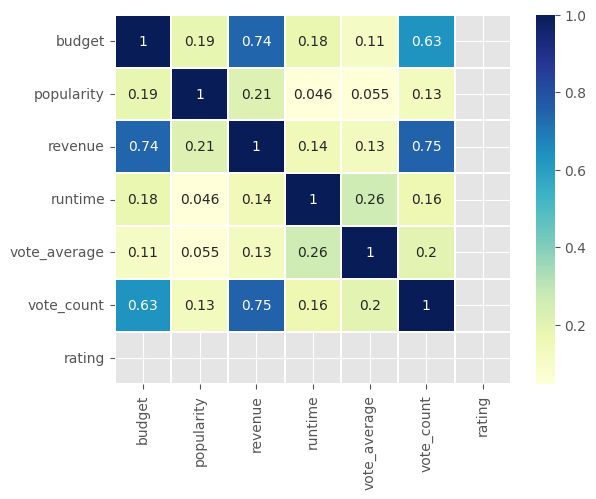

In [166]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), cmap='YlGnBu', annot=True, linewidths = 0.2);

From this corr chart we can see that revenue is strongly correlated with budget where as least correlated  runtime.

<ipython-input-167-c988379b6dd2>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




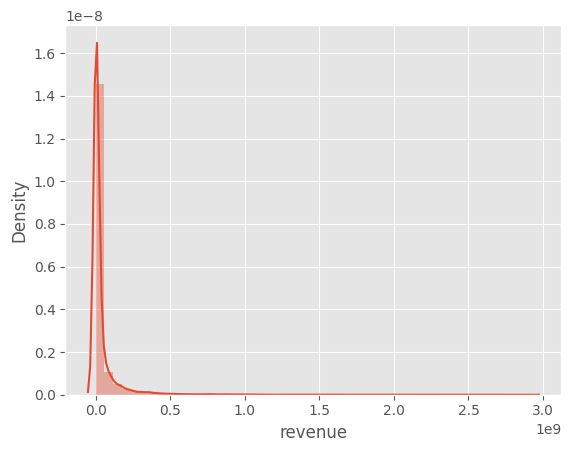

In [167]:
sns.distplot(df.revenue);

We can see that this data is very skewed and therefore it is difficult to draw conclusion from this graph.we knew to normalise this data.

<font color='blue'>**Introducing log**</font>


Why skewed data is not good fit for modeling in Linear Regression ?

* Because they may act as an outlier ,and we know that outlier is not good for our model performance.
* They have un even mean,median , mode and by law of large number, normal distribution allows the researcher to make more accurate predictions.
* To linearize the fit as much as possible.
Statistical test are usually based on the assumption of normality(normal distribution).

The log transformation, a widely used method to address skewed data, is one of the most popular transformations used in research.There fore we will be using log transformation in reveune.



In [168]:
#creating log transformation for reveune
df['log_revenue'] = np.log1p(df['revenue']) #we are not using log0 to avoid & and null value as there might be 0 value

<ipython-input-169-419b0ce0e9a4>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribuition of Revenue(log transformation)')

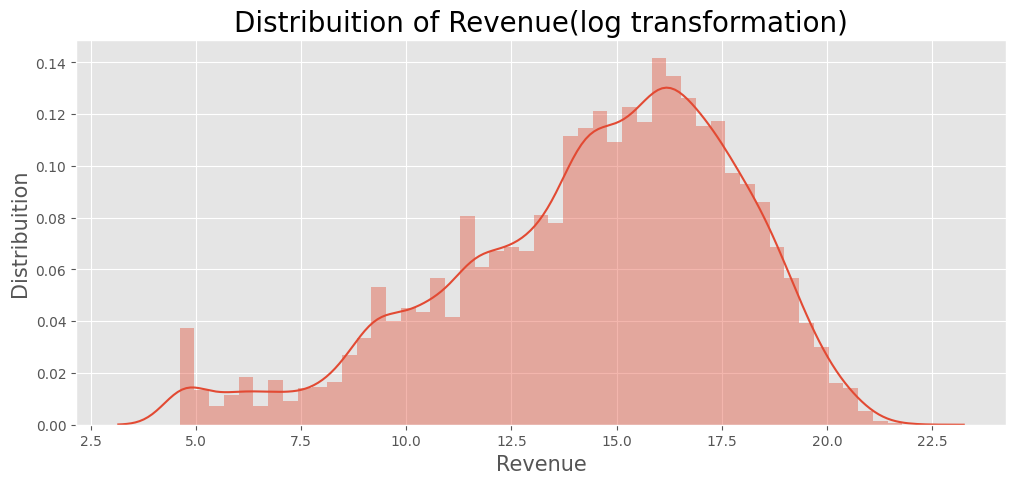

In [169]:
plt.figure(figsize=(12,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1

# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(df['log_revenue'])
ax.set_xlabel('Revenue', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue(log transformation)", fontsize=20) #seting the title and size of font

<ipython-input-170-2067b0ff8afa>:3: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



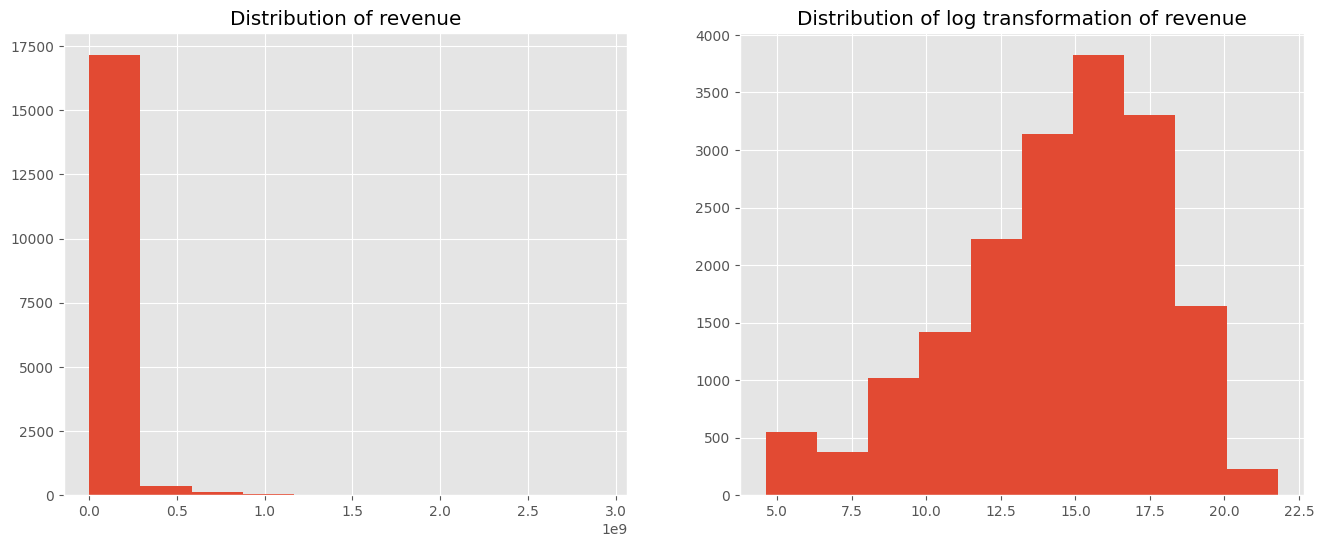

In [170]:
#comapring distribution of reveune and log revune side by side with histogram
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1) #1 means 1 plot, 2 means column and 1 mean 1 sub plot
plt.hist(df['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)#1 means 1 plot, 2 means column and 2 mean second sub plot
plt.hist(df['log_revenue']);
plt.title('Distribution of log transformation of revenue');

We can see that orginal distribution i.e (one without log) is extremely skewed. We used log transformation method and made data normally distribution which has less skeweness and kurtosis.

<font color='skyblue'>**Relationship between Film Revenue and Budget**</font>

Let's find correlation between revenue and budget. Let's also find the degree of co-relation.

In [171]:
#log transformation of budget
df['log_budget'] = np.log1p(df['budget'])

<ipython-input-172-2dbbd1cf8a68>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



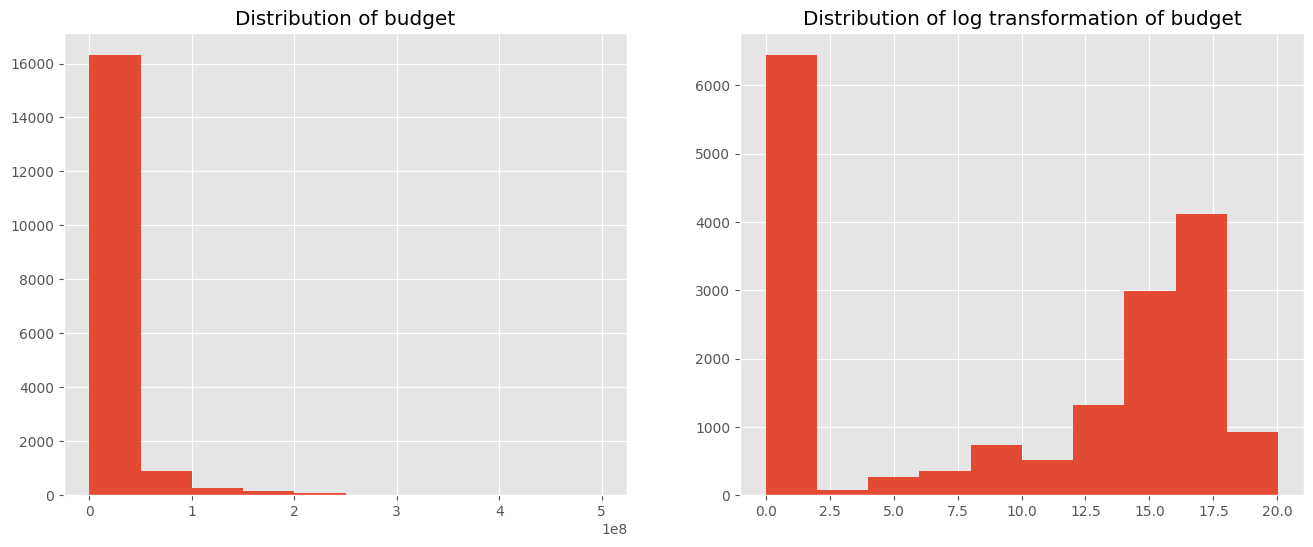

In [172]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(df['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(df['log_budget']);
plt.title('Distribution of log transformation of budget');

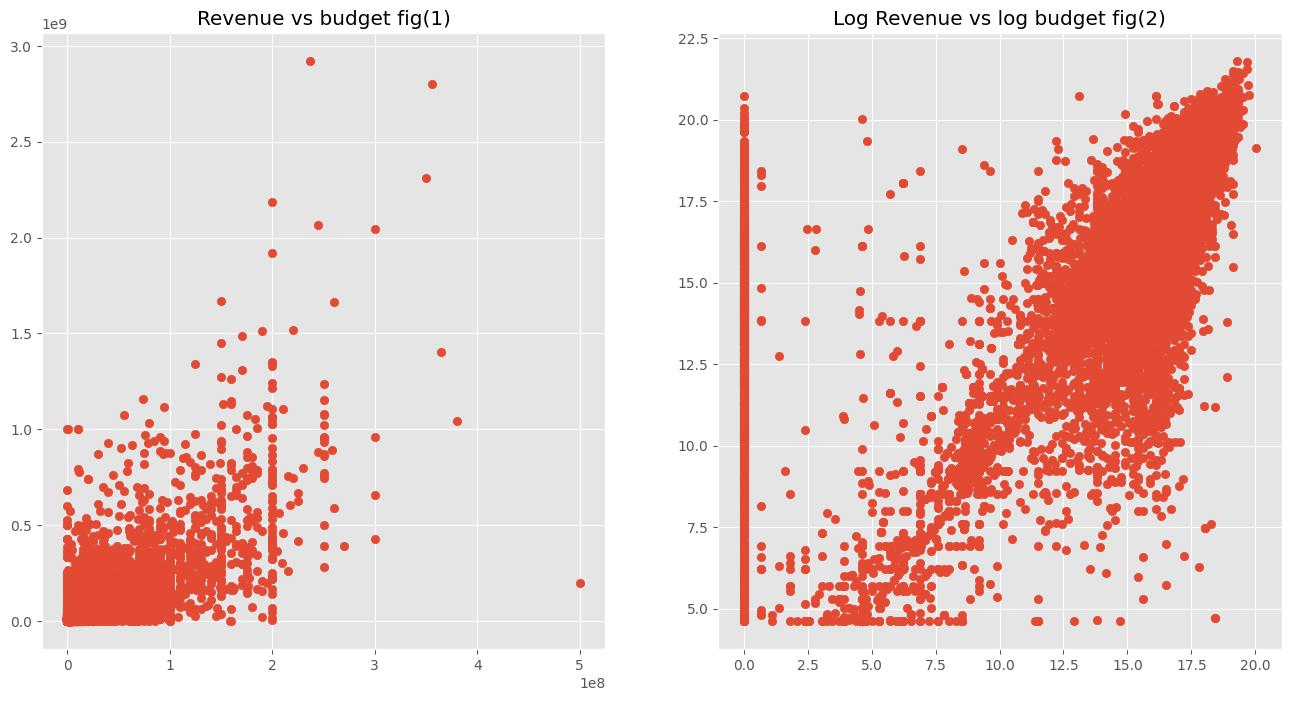

In [173]:
#let's create scatter plot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(df['log_budget'], df['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

Fig(1) : we can see that they are some what correlation beween budget and revenue, but we are not clear.

Fig(2) how ever indicates that there is correlation between both variable that is log transformation of reveune and log transformation of budget.

We can also see many movies on zero budget as we identified there were 815 movie that has zero budget which we will clear later.

<font color='skyblue'>**Is there any relationship with Homepage and Revenue?**</font>

Let's find out the correlation between two variable. We are more interested on answering if having official homepage for movie affects Reveune or not.

We all know that home page will be unique for each movie. Means differnet movie has different home page except the movie that has sequel/prequel. 

In [174]:
#lets check if movies website has count less than 1( means unique) or more than 1( means repeatetive) or not.
df['homepage'].value_counts().head(10)

http://www.rangitaranga.com/                          9
http://www.transformersmovie.com/                     4
http://www.kevinhartwhatnow.com/                      4
https://www.facebook.com/pg/maalikthemovie/           4
http://hannibalclassics.com/films/tokarev-aka-rage    4
http://www.inappropriatecomedy.com                    4
http://www.watchfinal.com/                            4
http://www.sabinarivaslapelicula.com.mx               4
http://www.jimmyvestvood.com/                         4
http://naturallynative.com/home.html                  4
Name: homepage, dtype: int64

we can see that transformers movies web page is listed 4 times which is obivous because we are all aware that this movie has seque. Same goes with lord of the rings and hobits.

Let's find if having home page affects revenue or not. And for that lets first find out movies has home page or not.

In [175]:
#let's creat column called has_homepage and pass two value 1,0 (1, indicates has home page, 0 indicates no page)
df['has_homepage'] = 0
df.loc[df['homepage'].isnull() == False, 'has_homepage'] = 1 #1 here means it has home page


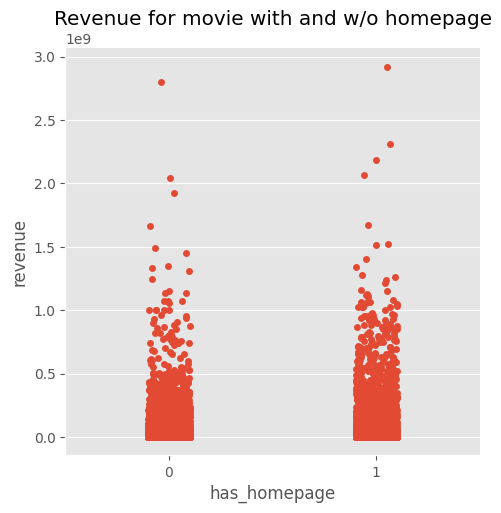

In [176]:
#since has_homepage is categorical value we will be using seaborn catplot.
sns.catplot(x='has_homepage', y='revenue', data=df);
plt.title('Revenue for movie with and w/o homepage');

From the above fig we can see that movie that has home page (indicated by blue) has more revenue compared to the movie that has no home page. From this scatterplot we can say that they may be correlated.

<font color='skyblue'>**Langauge distribution vs mean reveune**</font>

Let's find out the relationship between language and revenue .We will be calcualting top 10 langauge from the data frame and will be selecting langauage which is in df orginale_langauge. Here we will be using box plot as box plot is very useful for identifying outlier.

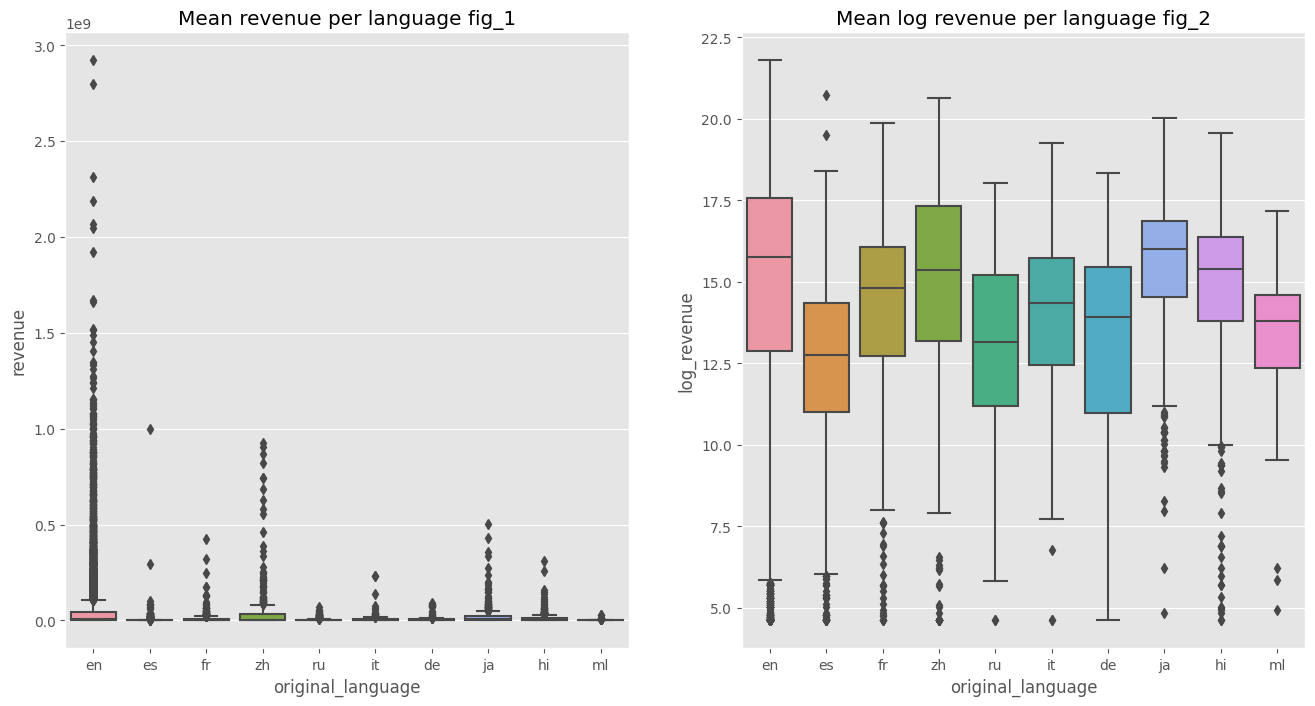

In [177]:
#we will be using blox pot
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language fig_1');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language fig_2');

> From the fig_1 we can see that x-axis indicated langaue plotted. We can see that english language has higher revenue by far margin compared to toher lagnguage. This graph also says us that english language over shadowed all other language in terms of revenue. This information may be quite incorrect and mis leading. Lets see fig_2 for more details

>From the fig_2 : We can see that orginal langauge vs log transformation of revenue and we can see that other language are also creating revenue near english language . How ever it's english language movie that is leading.

<font color='skyblue'>**What are the frequent Words in Film Titles and Discriptions ?**</font>


This is one of my favourite part of this analysis. I am very curious  to know the popular film titles also wanted to know if  description/synopsis affects revenue or not.

We will be using wordcount library. Word cloud is data visualization technique used for representaion of text data in which size of each word indicates it frequency or importance.

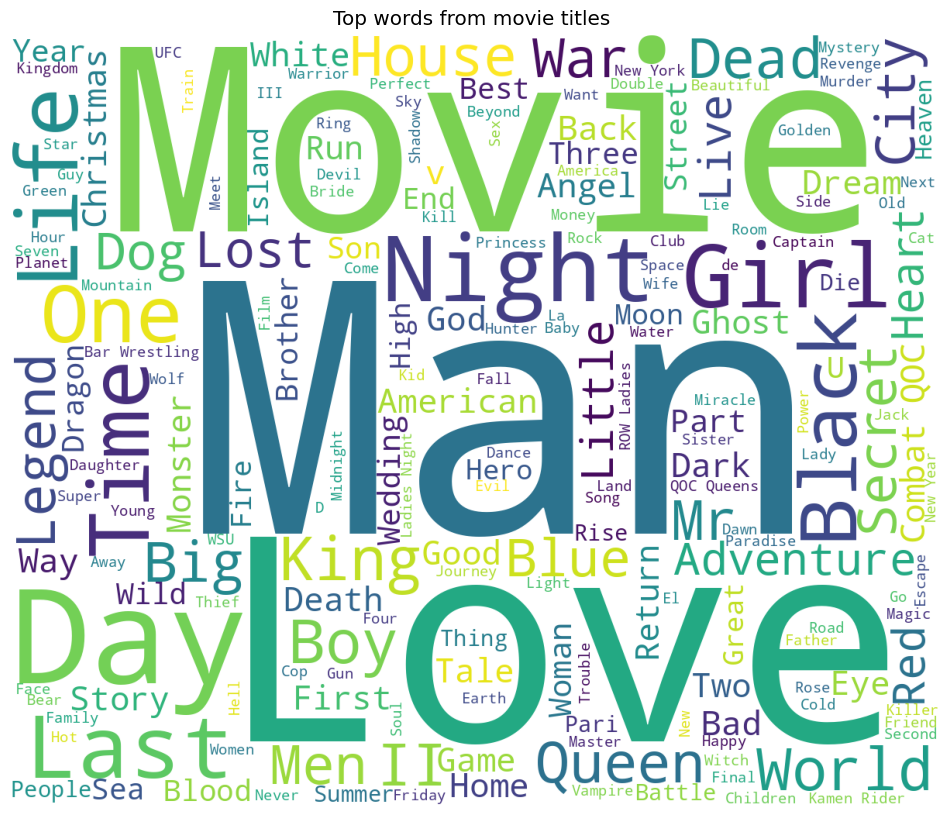

 Time taken to complete this operation is 3.981537103652954 seconds


In [178]:
#let's find top words from movie Titles
start = time.time()
plt.figure(figsize = (12, 12))
token_title = ' '.join(df['original_title'].values) #create split to title by sprace to extract the text.
#bg color set to white for good contrast, by default bg color is darker
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words from movie titles ')
plt.axis("off") # we dont need axes for this
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

We can see that the most popular word are Man,Last, La and so on. The most popular or frequent words are in bigger in size.

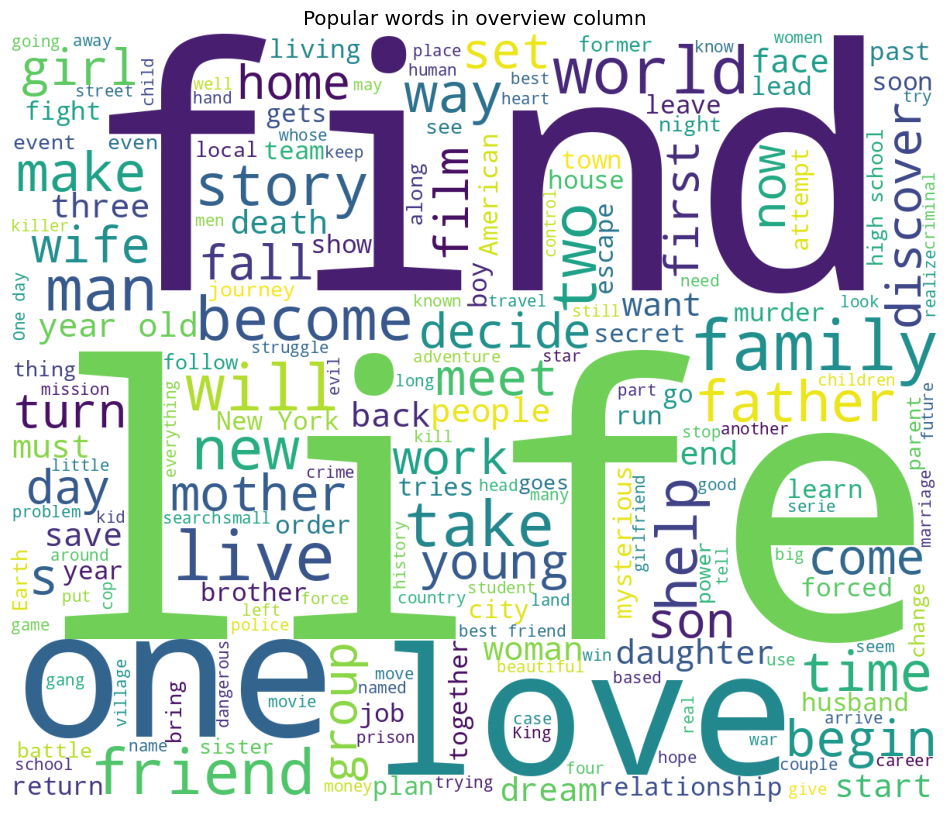

 Time taken to complete this operation is 7.7463250160217285 seconds


In [179]:
#let's find the popular words from overview coulumn
start = time.time()
plt.figure(figsize = (12, 12))
text = ' '.join(df['overview'].fillna('').values) #fill the values with empty string if there is no value in it.
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Popular words in overview column')
plt.axis("off")
plt.show()
print(" Time taken to complete this operation is", time.time() - start, 'seconds')

Larger words means frequent occuring words. We can see that life, find,one and so on are most popular words in movie description.

<font color='skyblue'>**Does the film description affects revenue**</font>

Let's find out if there is any link between words and revenue. Does the word in description affects revenue?

For this approach we will be using linear regression method . Yes linear regression for string data and we can achieve this by using TFID vector.


* TFID helps tp transforms text to feature vectors that can be used as input to estimator.
* TFID is numerical represenation of frequency of words around data description.

We will fit a linear regression model to this data to predict revenue generate. For this we will be using eli5 pacakge which helps to debug Machine learning classifier and also helps us to explain the prediction.So that it wil be easier to find which words affect revenue.




In [180]:
vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(df['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, df['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '<BIAS>')

We can see that words in description can have both positve and negative impacts on revenue. Words like to, bombing ,complication has positive impact and words like politicina,18, violence has negative impact on revenue.

In [181]:
print('Target value:', df['log_revenue'][1000])
eli5.show_prediction(linreg, doc=df['overview'].values[1000], vec=vectorizer)

Target value: 17.307801271313796


We can see that words in title can have both positve and negative impacts on revenue. Words like don,t age, the secret adn so on  has positive impact and words like death, she, land, hell and so on from movie titles has negative impact.

## <font color='skyblue'>**Featured Engineering**</font>


Issue with release_date is its not in right format so we need to standarlize using pandas date time format.

In [182]:
df.loc[df['release_date'].isnull() == False, 'release_date'].head() #to see if release date has null value.

0    1995-10-30
1    1995-12-15
2    1995-12-22
3    1995-12-22
4    1995-12-08
Name: release_date, dtype: object

<font color='blue'>fixing date column</font>

In [183]:
#drop nan columns
df = df.dropna(subset = ['release_date'])

In [184]:
def fix_date(x):
    '''
    if the value of date here is less than
    or equal to 19 we can prepend 20 infront of this
    to say that movie is from 2000s
    else we can prepend 19 to say that the movie is
    from 1900s
    '''
    year = x.split('/')[2]
    if int(year) <= 19:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

In [185]:
#df['release_date'] = df['release_date'].apply(lambda x: fix_date(x)) #applying lambda function

In [186]:
#let's create additional column like Year, month, week, quarter
df['release_date'] = pd.to_datetime(df['release_date']) #converting into panda date time
df['release_date'].head()

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-12-08
Name: release_date, dtype: datetime64[ns]

In [187]:
def process_date(df_date):
    '''This function adds columns like year, weekday, month, weekofyear, day, and quarter.
    It adds the prefix "release_date" before each of the columns, e.g., "release_date_year".'''
    date_parts = ["year", "weekday", "month", "day", "quarter"]
    
    # Convert 'release_date' column to datetime data type
    df_date['release_date'] = pd.to_datetime(df_date['release_date'])
    
    for part in date_parts:
        part_col = 'release_date' + "_" + part
        if part == "weekofyear":
            values = df_date['release_date'].dt.isocalendar().week
        else:
            values = getattr(df_date['release_date'].dt, part).fillna(-1).astype(int)
        df_date[part_col] = values
    
    return df_date


In [188]:
df = process_date(df)

In [189]:
# Count no.of films released per year and sort the years in ascending order
# Do this for both Train and Test Sets
d1 = df['release_date_year'].value_counts().sort_index()


# x values are years, and y values are movie counts, name=legend
data = go.Scatter(x=d1.index, y=d1.values, name='movies data')

layout = go.Layout(title = "Number of films per year", xaxis_title = 'Release date in Year',yaxis_title = 'Movie Count')
py.iplot(dict(data=data, layout=layout))


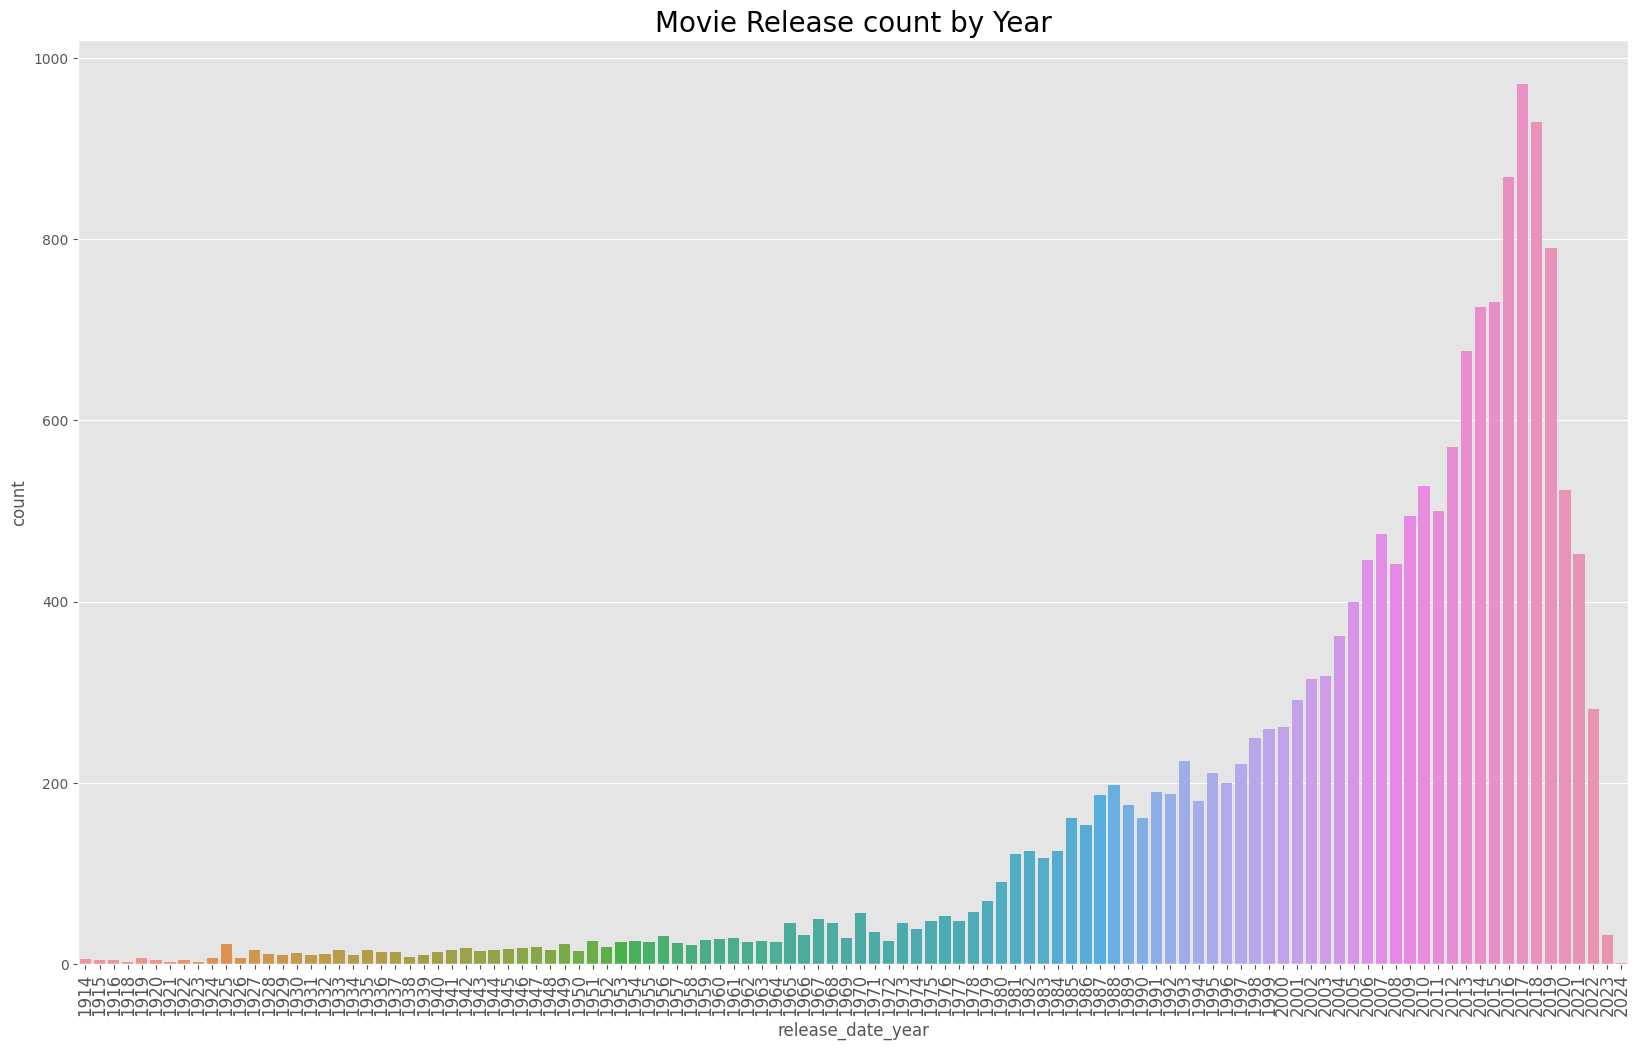

In [190]:
#countplot chart for movies release year
plt.figure(figsize=(20,12))
sns.countplot(x = df['release_date_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

We can see that since 2000s there are more movies that has been released.We can see that year 2013 has highes number of movie released i.e 140+ movie in a year.

In [191]:
#plot for release date vs revenue
d1 = df['release_date_year'].value_counts().sort_index()
d2 = df.groupby(['release_date_year'])['revenue'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

From this chart we can see that graph of total revenue vs movie release count from the year 1930 to 2017

<font color='skyblue'>**Do release date affects revenue ?**</font>

we will be creating categorical plot as day of the week, month are not continuous data.

<Figure size 2000x500 with 0 Axes>

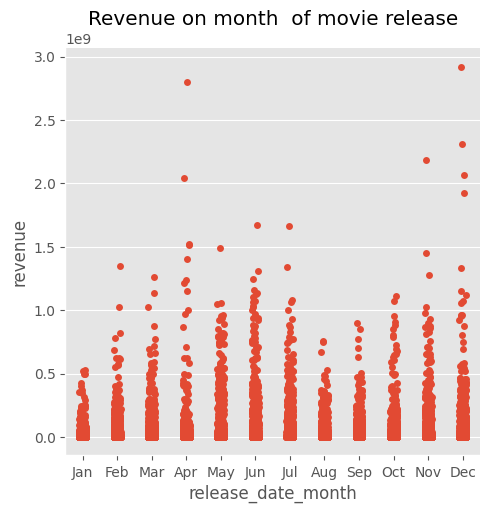

In [192]:
#since day, month are categorical variable
plt.figure(figsize=(20,5));
sns.catplot(x='release_date_month', y='revenue', data=df);
plt.title('Revenue on month  of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()


From the above chart we can see that movie released in April has maximum revenue where as movie released in jan has less revenue compared to other months.

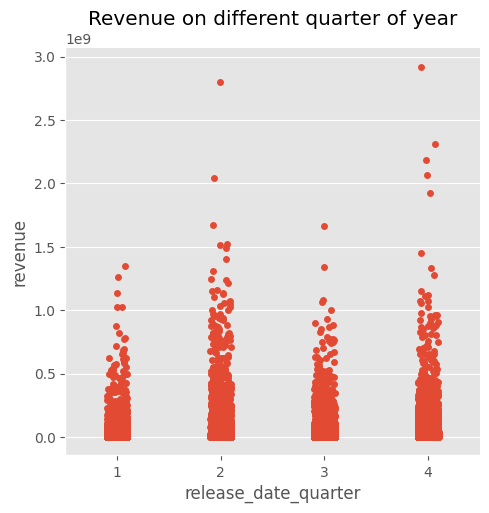

In [193]:
sns.catplot(x='release_date_quarter', y='revenue', data=df);
plt.title('Revenue on different quarter of year');

From the above chart we can see that movie released in second quarter (April-June) has more revenue compared to movie released in last quarter

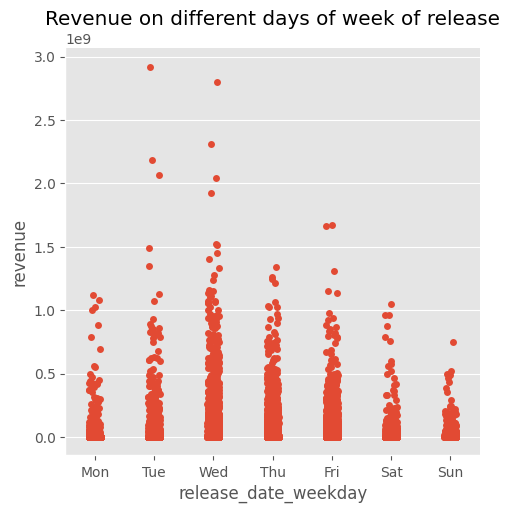

In [194]:
sns.catplot(x='release_date_weekday', y='revenue', data=df);
plt.title('Revenue on different days of week of release');
loc, labels = plt.xticks()
#putting label for days
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels)
plt.show()


Surprisingly movie released on wednesday and thursday has more revenue.

Well there seems to have correlation but it may not have one to one causal effect.

In [195]:
#top 20 movie by revenue
movies_20 =  df.sort_values(by='revenue', ascending=False).head(20)[['original_title','revenue','release_date_year']]

In [196]:
movies_20

,original_title,revenue,release_date_year
6470,Avatar,2.920357e+09,2009
10798,Avengers: Endgame,2.799439e+09,2019
8724,Avatar: The Way of Water,2.312336e+09,2022
1028,Titanic,2.187464e+09,1997
8719,Star Wars: The Force Awakens,2.068224e+09,2015
10778,Avengers: Infinity War,2.046240e+09,2018
10763,Spider-Man: No Way Home,1.921847e+09,2021
8592,Jurassic World,1.671537e+09,2015
10838,The Lion King,1.663075e+09,2019
7172,The Avengers,1.518816e+09,2012


<font color='blue'>**Relation between runtime and revenue ?**</font>

<ipython-input-197-76295ec58d9e>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




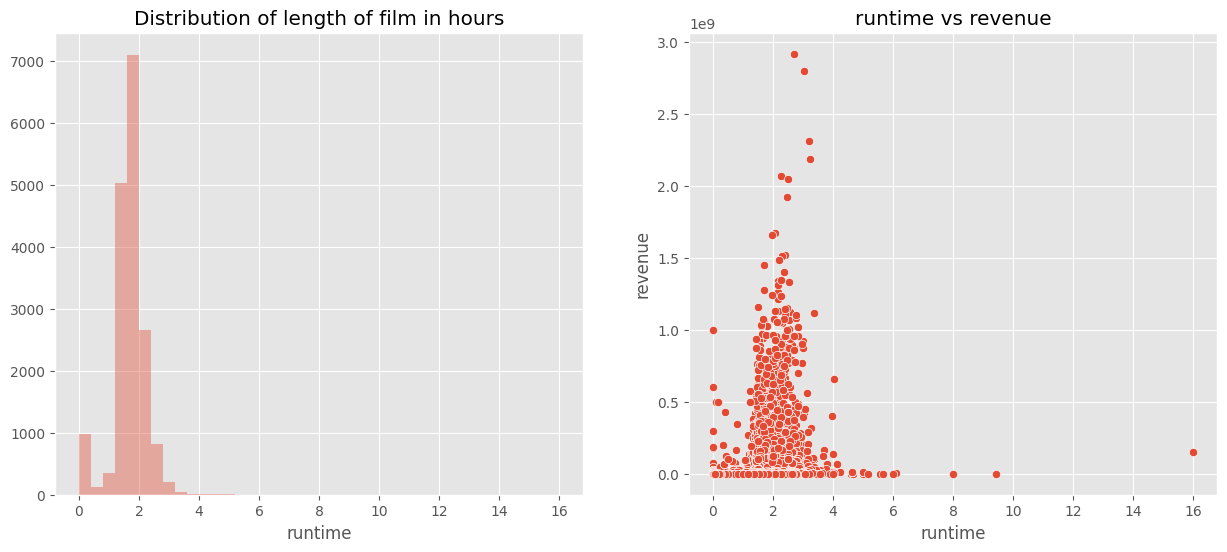

In [197]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['runtime'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(x = df['runtime'].fillna(0)/60, y = df['revenue'])
plt.title('runtime vs revenue');


Here we have run time in hour on x-axis and freq of movie in on y axis and then we cas see that most of the movie are between 1-3 hr.And the movie that fall on this duration has highest revenue.

<font color='skyblue'>**Find top genres from the movie list**</font>

In [198]:
# Apply the same preprocessing on the string values
# df.genres = df.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
df.genres.head()

0    ["Animation", "Adventure", "Family", "Comedy"]
1                ["Adventure", "Fantasy", "Family"]
2                             ["Romance", "Comedy"]
3                    ["Comedy", "Drama", "Romance"]
4                              ["Comedy", "Family"]
Name: genres, dtype: object

In [199]:
import ast
import pandas as pd

# Preprocess the genres column to convert the string representation of lists to actual lists
df['genres'] = df['genres'].apply(ast.literal_eval)

# Extract the unique genres from the "genres" column
unique_genres = pd.Series(df['genres'].sum()).unique()

# Print the number of genres and the unique genres themselves
print("Number of genres: {}".format(len(unique_genres)))
print("Genres: {}".format(unique_genres))


Number of genres: 20
Genres: ['Animation' 'Adventure' 'Family' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Horror' 'Mystery' 'Action' 'Crime' 'Thriller' 'History'
 'Science Fiction' 'War' 'Music' 'Documentary' 'Western' 'Foreign'
 'TV Movie']


In [200]:
genres_dummies = pd.get_dummies(df["genres"].apply(pd.Series).stack().str.strip("[]").str.replace("'", ""))
genres_dummies = genres_dummies.groupby(level=0).sum()
genres_dummies

<ipython-input-200-aa0f02c91522>:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17708,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17709,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
17710,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
17714,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [201]:
train_genres = pd.concat([df, genres_dummies],axis=1, sort=False) #merging two data frame
train_genres.head(5)

,adult,belongs_to_collection,homepage,id,imdb_id,production_countries,spoken_languages,video,keywords,backdrop_path,recommendations,budget,genres,original_language,original_title,overview,popularity,poster_path,production_companies,release_date,revenue,runtime,status,tagline,vote_average,vote_count,cast,director,Top Cast,rating,log_revenue,log_budget,has_homepage,release_date_year,release_date_weekday,release_date_month,release_date_day,release_date_quarter,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",http://toystory.disney.com/toy-story,862,tt0114709,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,martial arts-jealousy-friendship-bullying-elem...,/lxD5ak7BOoinRNehOCA85CQ8ubr.jpg,863-10193-585-12-9806-2062-14160-920-808-10681...,30000000.0,"[Animation, Adventure, Family, Comedy]",en,Toy Story,Led by Woody Andy's toys live happily in his r...,111.892,/uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg,Pixar,1995-10-30,373554033.0,81.0,Released,NaN,7.966,16430.0,Tom Hanks-Tim Allen-Don Rickles-Jim Varney-Wal...,John Lasseter,"[""Tom Hanks"", ""Tim Allen"", ""Don Rickles"", ""Jim...",NaN,19.738573,17.216708,1,1995,0,10,30,4,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,NaN,NaN,8844,tt0113497,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",false,giant insect-board game-jungle-disappearance-r...,/pYw10zrqfkdm3yD9JTO6vEGQhKy.jpg,1593-788-879-771-854-772-118-353486-310-18360-...,65000000.0,"[Adventure, Fantasy, Family]",en,Jumanji,When siblings Judy and Peter discover an encha...,13.680,/vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg,TriStar Pictures-PolyGram Filmed Entertainment...,1995-12-15,262821940.0,104.0,Released,Roll the dice and unleash the excitement!,7.237,9437.0,Robin Williams-Kirsten Dunst-Bradley Pierce-Bo...,Joe Johnston,"[""Robin Williams"", ""Kirsten Dunst"", ""Bradley P...",NaN,19.386987,17.989898,0,1995,4,12,15,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,15602,tt0113228,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,fishing-halloween-sequel-old man-best friend-w...,/1J4Z7VhdAgtdd97nCxY7dcBpjGT.jpg,11520-12139-5825-951-11846-9340-620-329-24428,25000000.0,"[Romance, Comedy]",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.879,/1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg,Lancaster Gate-Warner Bros. Pictures,1995-12-22,71500000.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,6.500,324.0,Walter Matthau-Jack Lemmon-Ann-Margret-Sophia ...,Howard Deutch,"[""Walter Matthau"", ""Jack Lemmon"", ""Ann"", ""Marg...",NaN,18.085208,17.034386,0,1995,4,12,22,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,False,NaN,NaN,31357,tt0114885,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,based on novel or book-interracial relationshi...,/jZjoEKXMTDoZAGdkjhAdJaKtXSN.jpg,NaN,16000000.0,"[Comedy, Drama, Romance]",en,Waiting to Exhale,Cheated on mistreated and stepped on the women...,14.013,/4uw6HKq4vlhrSVp0zkgd4zCy4Pf.jpg,20th Century Fox,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,6.300,128.0,Whitney Houston-Angela Bassett-Loretta Devine-...,Forest Whitaker,"[""Whitney Houston"", ""Angela Bassett"", ""Loretta...",NaN,18.215526,16.588099,0,1995,4,12,22,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",NaN,11862,tt0113041,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",false,parent child relationship-

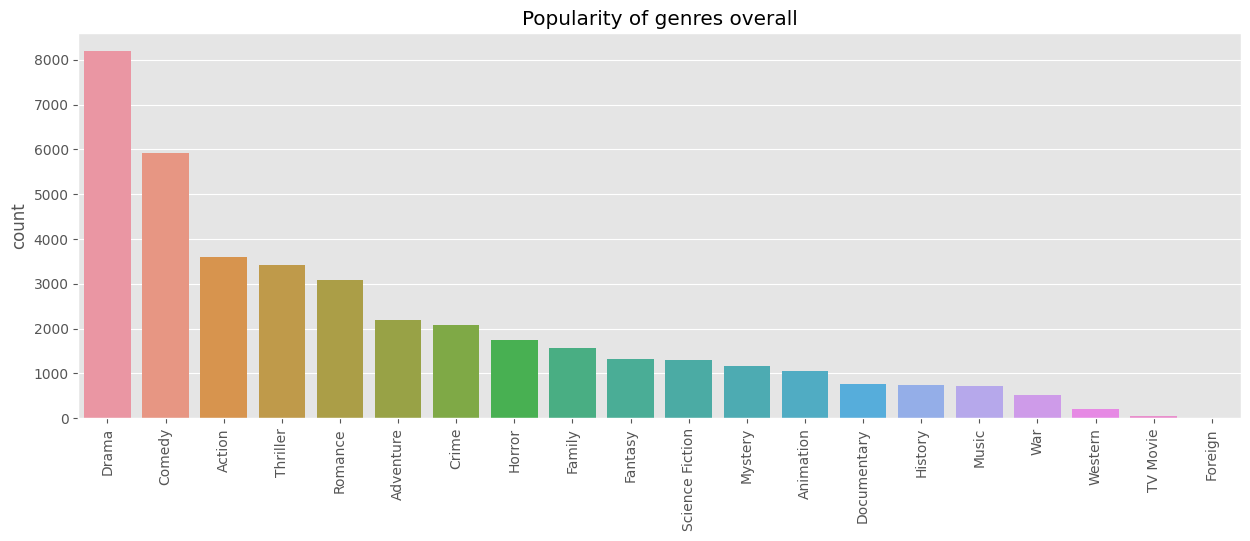

In [202]:
genres_overall = train_genres[unique_genres].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=genres_overall.index, y=genres_overall.values)
plt.xticks(rotation=90)
plt.title("Popularity of genres overall")
plt.ylabel("count")
plt.show()

We can see that , from above genre, Drama is more popular ad foreign movie are least popular.

<font color='skyblue'>**Model Prediction**</font>

In [203]:
train_genres.columns

Index(['adult', 'belongs_to_collection', 'homepage', 'id', 'imdb_id',
       'production_countries', 'spoken_languages', 'video', 'keywords',
       'backdrop_path', 'recommendations', 'budget', 'genres',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'release_date', 'revenue',
       'runtime', 'status', 'tagline', 'vote_average', 'vote_count', 'cast',
       'director', 'Top Cast', 'rating', 'log_revenue', 'log_budget',
       'has_homepage', 'release_date_year', 'release_date_weekday',
       'release_date_month', 'release_date_day', 'release_date_quarter',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [204]:
#selecting the numeric column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #so that easy for us to perform  train and test
df_train=train_genres.select_dtypes(include=numerics)

In [205]:
#dropping the id coulmn
#df_train.drop(columns=['id'],inplace=True) #we will be dropping ID

# Clear null values
df_train=df_train.fillna(df_train.median()) #let's film the empty value with median of the data set

In [206]:
#selecting dataframe that is float,int
df_train.columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'rating', 'log_revenue', 'log_budget', 'has_homepage',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_day', 'release_date_quarter', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

<font color='skyblue'>**Loading data from Training**</font>

In [207]:
#training the model
X = df_train.drop(['revenue', 'log_revenue'], axis=1)
y= df_train['revenue'] #prediction


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Convert feature names to string type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Create an instance of the LinearRegression model
lm = LinearRegression()


# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the model on the imputed training data
lm.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
lm_preds = lm.predict(X_test_imputed)

# Calculate and print the R-squared score
print("R Square: ", r2_score(y_test, lm_preds))


R Square:  0.6923196595547488


Our R square value is 72.07%

In [212]:
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

# Create an instance of the RandomForestRegressor model
RF_model = RandomForestRegressor(random_state=0, n_estimators=500, max_depth=10)

RF_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
y_hat = RF_model.predict(X_test_imputed)

# Calculate and print the R-squared score
print("R-Squared is:", metrics.r2_score(y_test, y_hat))


R-Squared is: 0.7241646835552467


Our predicted from Random forest is 77.7% accurate.

In [213]:
RF_model.feature_importances_

array([1.82513904e-01, 6.77494880e-02, 2.97765659e-02, 2.17724505e-02,
       4.21905404e-01, 1.90503104e-01, 1.71547796e-03, 2.68378025e-02,
       6.26295144e-03, 7.50135981e-03, 1.15490279e-02, 2.12141914e-03,
       1.62383350e-03, 6.86115315e-03, 1.95704685e-03, 2.08756560e-03,
       1.08824754e-03, 1.64650860e-04, 1.45258099e-03, 2.22226327e-03,
       2.57295290e-03, 0.00000000e+00, 2.68275514e-04, 3.68991229e-04,
       6.39374919e-04, 6.81497341e-04, 1.68621886e-03, 3.09779447e-03,
       6.58196737e-05, 2.23970627e-03, 5.17527366e-04, 1.95545364e-04])

In [214]:
print(len(X_train.columns))
print(len(RF_model.feature_importances_))


33
32


                      importance
feature                         
vote_count                 0.422
log_budget                 0.191
budget                     0.183
popularity                 0.068
runtime                    0.030
release_date_year          0.027
vote_average               0.022
release_date_day           0.012
release_date_month         0.008
Adventure                  0.007
release_date_weekday       0.006
Science Fiction            0.003
Fantasy                    0.003
Romance                    0.002
Family                     0.002
Thriller                   0.002
Action                     0.002
Comedy                     0.002
Animation                  0.002
release_date_quarter       0.002
has_homepage               0.002
War                        0.001
Music                      0.001
Mystery                    0.001
Crime                      0.001
Drama                      0.001
Horror                     0.000
History                    0.000
Foreign   

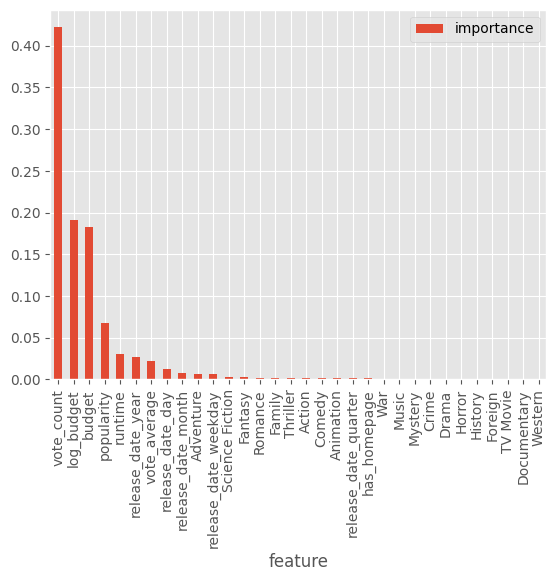

In [215]:
column_names = imputer.get_feature_names_out(input_features=X_train.columns)

importances = pd.DataFrame({'feature':column_names,'importance':np.round(RF_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature');
print(importances)
importances.plot.bar();

We can see that Budget, popularity, runtime and release date of year (as release date of year is associated with population)has more weight on our feature.

### LGB MODEL

In [216]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [217]:
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [218]:
lgb_model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)

eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning:

'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[1000]	training's rmse: 4.35845e+07	valid_1's rmse: 6.01883e+07


Weight,Feature
0.4932,vote_count
0.3027,budget
0.0446,log_budget
0.0433,popularity
0.0258,release_date_year
0.0242,runtime
0.0227,vote_average
0.0125,Adventure
0.0052,release_date_month
0.0047,release_date_day


### GB regressor

In [223]:
from sklearn import ensemble

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train.columns = X_train.columns.astype(str)
X_train_imputed = imputer.fit_transform(X_train)

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train_imputed, y_train)
training_score = clf.score(X_train_imputed, y_train)
print(f"Training Score: {training_score}")


Training Score: 0.8700708464104958


In [224]:
X_test_imputed = imputer.fit_transform(X_test)

predictions2 = np.expand_dims(clf.predict(X_test_imputed), axis = 1)

MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test_imputed, y_test)
print(f"MSE: {MSE}, R2: {r2}")

MSE: 2497835378709478.5, R2: 0.808384613881175


Our R square predicted from GB booster is quite better than other model with R square of 83.3%

In [225]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test_imputed)
gbr_predictions = pd.DataFrame(revenue_predictions,columns = ['revenue_predictions'])
gbr_predictions.head()

,revenue_predictions
0,5.936126e+06
1,3.042231e+07
2,6.908916e+06
3,5.379410e+08
4,2.425196e+07


In [226]:
test_result = gbr_predictions.join(y_test.reset_index(drop=True))
test_result = test_result.join(X_test.reset_index(drop=True))

#look at top values only
test_result = test_result[['budget', 'popularity', 'vote_average','vote_count','release_date_year','release_date_month', 'revenue','revenue_predictions']]
test_result.head()

,budget,popularity,vote_average,vote_count,release_date_year,release_date_month,revenue,revenue_predictions
0,770000.0,1.400,5.500,4.0,2014,12,3100000.0,5.936126e+06
1,14000000.0,11.812,6.600,374.0,1977,6,16400000.0,3.042231e+07
2,0.0,8.342,6.400,7.0,2017,1,77174241.0,6.908916e+06
3,97000000.0,68.993,7.815,17552.0,2017,2,619021436.0,5.379410e+08
4,11318430.0,10.979,6.500,840.0,2018,5,17997350.0,2.425196e+07


Here we can see reveune predicted from our testing model

## <font color='skyblue'>Conclusion</font>

Key Finding:

* The most popular genres, ranked in order, are Drama, Comedy, and Action.
* Among all genres, Adventure has the most significant impact on the box office.
* Foreign Movies generate comparatively lower revenue compared to other genres.
* In 2013, the highest number of movies were released in a single calendar year.
* The second quarter of the year witnessed the highest revenue generation from movie releases.
* There existed a strong correlation between the budget and revenue of movies.
* Movies with a higher budget tend to exhibit a tendency for higher revenues.


**The key point from the above model training and the tunning process is that we may be able to predict the movie revenue using featured labels like the Movie release date of the year( as the year is associated with the population of that time, Budget of movie, Popularity, run time. And Movie industries and persons associated with Movies can use the Machine learning model to predict the revenue of the movie by inputting the above featured**.

**We had a data set of 3000 rows and 23 columns originally. We trained and test using the above data set. There fore, we have some limitations on our model as it could not provide accurate results and to improve model performance we have to add more data set and add a few featured variables.Therefore, a larger number of observations to capture more variability in the movie data in our testing data set is required to have a better measure of the model’s accuracy.**

Key Takeaways:
Machine learning helps forecasting revenue prediction for new movies before their release, leveraging factors that significantly impact box office performance.
The revenue prediction model provides valuable insights to empower industry stakeholders in making informed decisions and improving financial outcomes.
Our product offers a competitive advantage by providing insights into the potential success of a movie, helping stakeholders optimizing marketing campaigns and resource allocation.
Possible Enhancements：
Integration of more Real-Time Data: Incorporating real-time data sources like ticket sales, social media trends etc.
Genre-Specific Models: Developing specialized prediction models for different film genres to capture the unique audience preferences and characteristics of each genre.
Expand the exploration of relationships among actors, directors and their affiliations with different corporations.
Using advanced developer access levels can provide access to more comprehensive and valuable information through APIs. 
